In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# List of files and their respective paths
file_paths = [
    '../data/Bay Area/Water Level - Alameda.csv',
    '../data/Bay Area/Water Level - Martinez-Amorco Pier.csv',
    '../data/Bay Area/Water Level - Port Chicago.csv',
    '../data/Bay Area/Water Level - Redwood City.csv',
    '../data/Bay Area/Water Level - Richmond.csv',
    '../data/Bay Area/Water Level - San Francisco.csv'
]

# List to store dataframes
dataframes = []

# Read each file, calculate monthly and hourly averages, and store in list
for path in file_paths:
    city_name = os.path.basename(path).split(' - ')[-1].replace('.csv', '')
    df = pd.read_csv(path)
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month_name()
    df['Hour'] = df['Time (GMT)']
    
    # Calculate monthly average for the comparative monthly heat map
    monthly_avg = df.groupby(['Month'])['Verified (ft)'].mean()
    monthly_avg.name = city_name  # Rename series to city name
    
    # Calculate hourly average for the comparative hourly heat map
    hourly_avg = df.groupby(['Hour'])['Verified (ft)'].mean()
    hourly_avg.name = city_name  # Rename series to city name
    
    # Store results
    dataframes.append({
        'monthly_avg': monthly_avg,
        'hourly_avg': hourly_avg
    })

# Concatenate all monthly and hourly averages into single dataframes
monthly_avg_df = pd.concat([d['monthly_avg'] for d in dataframes], axis=1)
hourly_avg_df = pd.concat([d['hourly_avg'] for d in dataframes], axis=1)

# Reorder the index by month order for monthly averages
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg_df = monthly_avg_df.reindex(month_order)

monthly_avg_df, hourly_avg_df


(            Alameda  Martinez-Amorco Pier  Port Chicago  Redwood City  \
 Month                                                                   
 January    3.822870              3.469819      3.020242      4.828306   
 February   3.730599              3.334993      2.912273      4.739430   
 March      3.680880              3.339624      2.931183      4.679570   
 April      3.410583              3.027694      2.584333      4.471097   
 May        3.795780              3.463911      3.095081      4.827473   
 June       3.797208              3.449778      3.112417      4.836750   
 July       3.792688              3.378185      3.025605      4.853723   
 August     3.913831              3.441989      3.079409      4.954167   
 September  3.867431              3.366847      2.998333      4.883389   
 October    3.887688              3.332648      2.932164      4.892298   
 November   3.822500              3.245153      2.794792      4.808153   
 December   3.838024              3.29

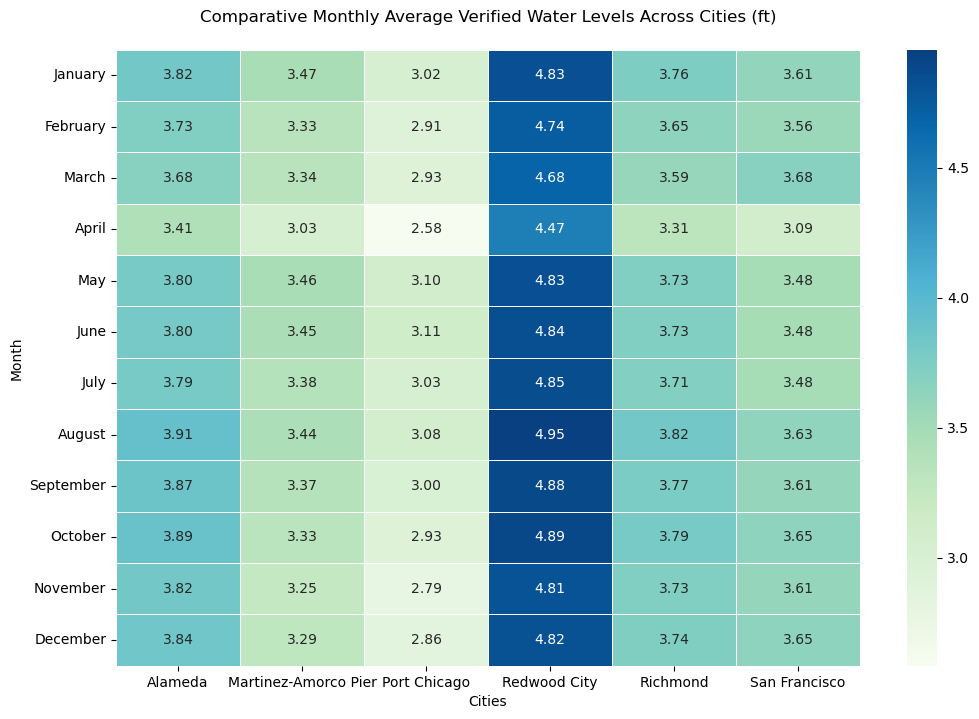

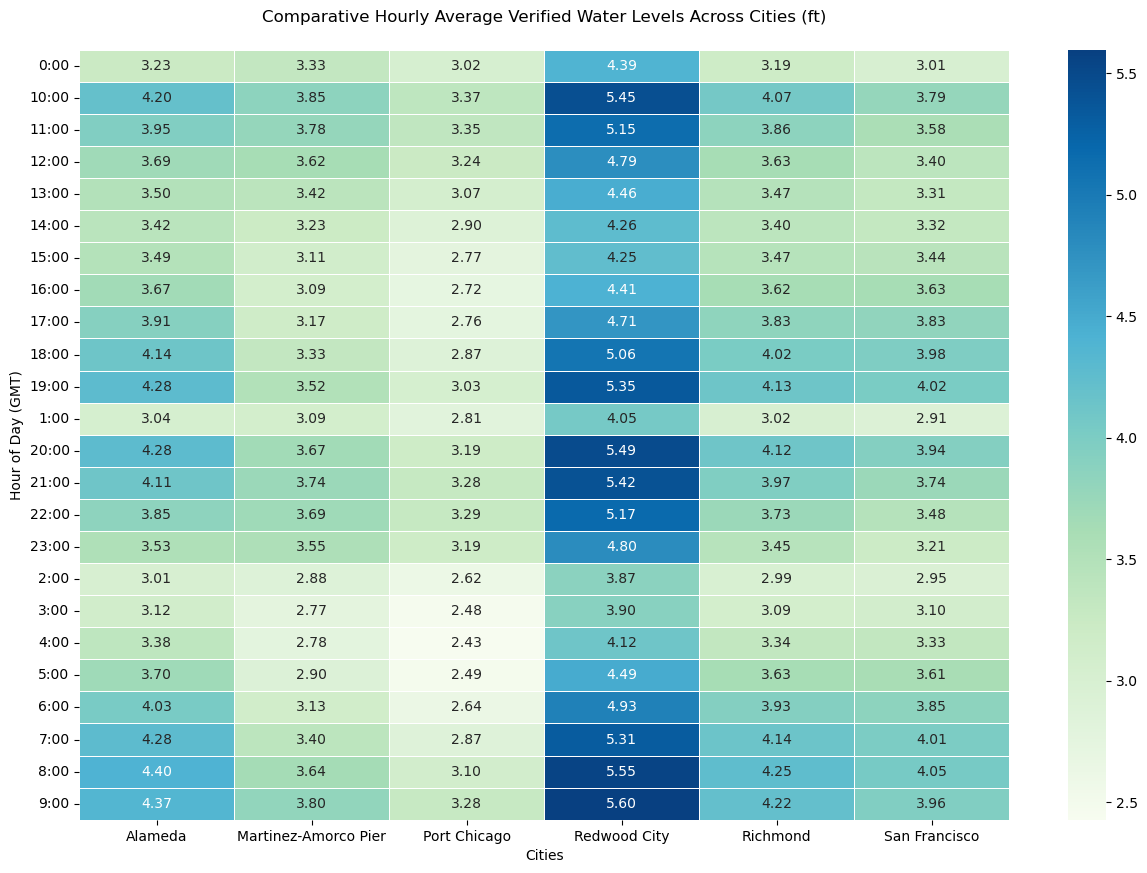

In [2]:
# Plotting the regional heat map for monthly average data across cities
plt.figure(figsize=(12, 8))
regional_monthly_heatmap = sns.heatmap(monthly_avg_df, cmap="GnBu", annot=True, fmt=".2f", linewidths=.5)
regional_monthly_heatmap.set_title('Comparative Monthly Average Verified Water Levels Across Cities (ft)', pad=20)
plt.xlabel('Cities')
plt.ylabel('Month')
plt.show()

# Plotting the regional heat map for hourly average data across cities
plt.figure(figsize=(15, 10))
regional_hourly_heatmap = sns.heatmap(hourly_avg_df, cmap="GnBu", annot=True, fmt=".2f", linewidths=.5)
regional_hourly_heatmap.set_title('Comparative Hourly Average Verified Water Levels Across Cities (ft)', pad=20)
plt.xlabel('Cities')
plt.ylabel('Hour of Day (GMT)')
plt.show()
